We have the Riemann zeta function in a series that converges for $\Re s > 0$:
$$
\zeta(s)=\frac{1}{1-2^{1-s}}\sum_{n=1}^{\infty}\frac{(-1)^{n-1}}{n^{s}}
$$
Let's see how fast this converges.

In [7]:
s = complex(0.5,1200)

steps = [5,10,50,100,500,1000,5000]

zeta = 0

partial_sum = 0
for n in range(1,5001):
    partial_sum = partial_sum + (-1)**(n-1)*n**(-s)
    if n in steps:
        print(n,partial_sum/(1-2**(1-s)))

5 (0.5987292141974183-0.18442243561690594j)
10 (0.44065787987635174+0.33155303758192967j)
50 (0.8532618784461518+0.2229276301692738j)
100 (0.5726462571210893+0.05769006650938157j)
500 (1.383586955468252+0.08789690387495061j)
1000 (1.4055273574927987+0.06705102185796002j)
5000 (1.397389835138219+0.061245213663894356j)


Let's define a function that computes the zeta function. It looks like taking the series to 1000 is sufficient.

In [8]:
def zeta(s):
    zeta = 0.0 # obviously not zeta(s) yet!
    for n in range(1,1001):
        zeta = zeta + (-1)**(n-1)*n**(-s)
    return zeta/(1-2**(1-s))

print(zeta(complex(0.5,1200)))

(1.4055273574927987+0.06705102185796002j)


I want to plot the value of $\zeta(s)$ for $s$ on the critical line, The action occurs on $\Im s=1/2$. Let's first plot a sine wave...

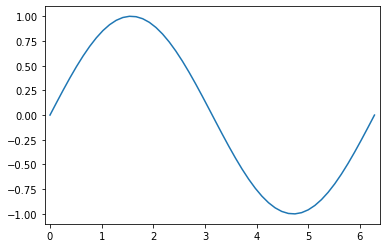

In [1]:
# code from https://blog.finxter.com/matplotlib-animation/

# Standard imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set up empty Figure, Axes and Line objects
fig, ax = plt.subplots()
# Set axes limits so that the whole image is included
ax.set(xlim=(-0.1, 2*np.pi+0.1), ylim=(-1.1, 1.1))
# Draw a blank line
line, = ax.plot([], [])  

# Define data - one sine wave
x = np.linspace(0, 2*np.pi, num=50)
y = np.sin(x)

# Define animate function
def animate(i):
    line.set_data(x[:i], y[:i])
    return line,

# Pass to FuncAnimation
anim = FuncAnimation(fig, animate, frames=len(x)+1, interval=30, blit=True)

# Save in the current working directory
anim.save('sin.mp4')

The previous creates an external video file. How about an inline one? 

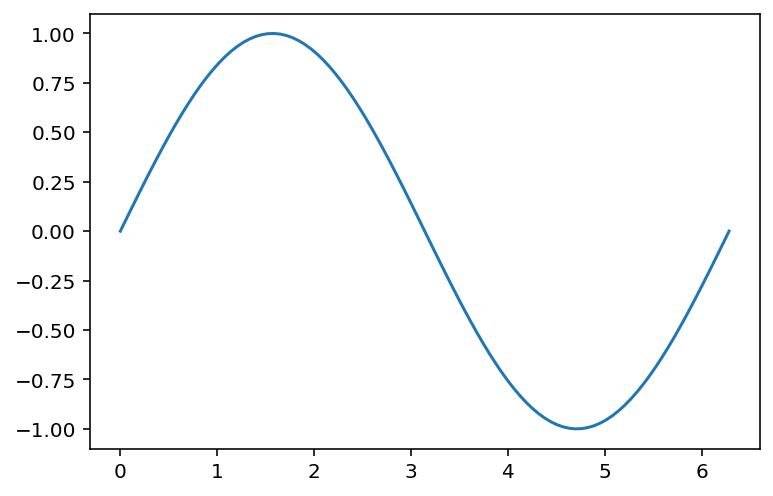

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.show()

In [4]:
# now for the inline animation...

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display


# Enable interactive plot
%matplotlib notebook
%matplotlib notebook


# Turn off matplotlib plot in Notebook
plt.ioff()
# Pass the ffmpeg path. Only needed for windows users:
# plt.rcParams['animation.ffmpeg_path'] = '/Users/chen5/Downloads/ffmpeg'

fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)


def animate(frame_num):
    y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x, y))
    return line

anim = FuncAnimation(fig, animate, frames=100, interval=20)

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

Traceback (most recent call last):
  File "/home/robert/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/robert/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'
